<a href="https://colab.research.google.com/github/Supathatkh/datasci_/blob/main/04v_basic_pytorch_for_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic libraries and Pytorch

ในบทเรียนนี้เราจะลองนำภาพจากชุดข้อมูล Dog breed classification มาทดลอง Image augmentation และสร้าง Convolutional Neural Network (CNN) อย่างง่ายกัน

วิธีการโหลดของข้อมูลจาก Kaggle:

*   !pip install kaggle

*   !kaggle competitions download -c dog-breed-identification
*   !unzip dog-breed-identification.zip -d data






In [1]:
# ! นำหน้าใน Notebook แปลว่าให้รันใน Terminal
!pip install kaggle
from google.colab import files #อัพโหลดไฟล์ kaggle.json เพื่อเชื่อม kaggle เข้ากับ colab
files.upload()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahcee","key":"d99be866800020a6aaa79895f663ce0e"}'}

In [2]:
#เชื่อม kaggle เข้ากับ colab
! mkdir ~/.kaggle
! cp kaggle.json  ~/.kaggle/
! cp chmod 600 ~/.kaggle/kaggle.json


cp: target '/root/.kaggle/kaggle.json' is not a directory


In [3]:
!kaggle competitions download -c dog-breed-identification #โหลดไฟล์ทีจะใช้ในการ classification

 96% 664M/691M [00:03<00:00, 140MB/s]
100% 691M/691M [00:04<00:00, 178MB/s]


In [4]:
!unzip dog-breed-identification.zip -d data #แตกไฟล์ zip ที่โหลดมาจาก kaggle

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: data/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: data/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: data/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: data/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: data/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: data/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: data/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: data/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: data/train/83fad0718581a696132c96c166472627.jpg  
  inflating: data/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: data/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: data/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: data/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: data/train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: data/train/840dbad5a691c22611d85b2488bf4cbb.jpg 

In [5]:
import os.path as op
import torch
import pandas as pd
from glob import glob

In [6]:
img_df = pd.DataFrame(glob("data/train/*.jpg"), columns=["path"])
img_df["id"] = img_df.path.map(lambda x: op.basename(x).replace(".jpg", ""))

# read label data
label_df = pd.read_csv("data/labels.csv")
train_df = img_df.merge(label_df, on="id")

In [7]:
train_df.head()

,path,id,breed
0,data/train/8ce5703ad6a594ab9ba7540964789fe4.jpg,8ce5703ad6a594ab9ba7540964789fe4,black-and-tan_coonhound
1,data/train/1c564272c2c290a83bf4a520359cfd5c.jpg,1c564272c2c290a83bf4a520359cfd5c,great_pyrenees
2,data/train/a01ae294072cdf98548d45d1b60f200a.jpg,a01ae294072cdf98548d45d1b60f200a,french_bulldog
3,data/train/43eb1e0b1a6baaa87cc70d4e21d99389.jpg,43eb1e0b1a6baaa87cc70d4e21d99389,german_shepherd
4,data/train/d63348c8d835cd499da54d8de6a11803.jpg,d63348c8d835cd499da54d8de6a11803,tibetan_mastiff


In [9]:
from PIL import Image #Import ไลบรารี่ที่ใช้ดูรูปภาพ

In [13]:
img = Image.open(train_df.path.iloc[0])

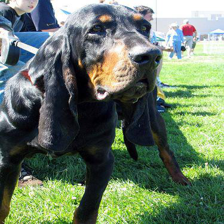

In [14]:
img.resize((224, 224)) # resize ภาพให้เป็นขนาด 224 x 224

##Image augmentation

Image augmentation เป็นหนึ่งในการนำภาพที่มีอยู่มาปรับแต่งเล็กน้อยเพื่อให้ได้ภาพที่มีความหลากหลายมากยิ่งขึ้น ส่วนมากการใช้ Image augmentation มาใช้ในโมเดลจะทำให้โมเดลสามารถเรียนรู้ได้ดียิ่งขึ้นอีกด้วย และลดการ overfit ของชุดข้อมูลที่เราใส่เข้าไปได้

ไลบรารี่ augmentation ที่เป็นที่นิยมได้แก่


*   torchvision (อ่านเพิ่มเติมได้ที่ https://pytorch.org/vision/stable/transforms.html)
*   albumentations (อ่านเพิ่มเติมได้ที่ https://albumentations.ai/docs/)



In [11]:
import torchvision.transforms as T

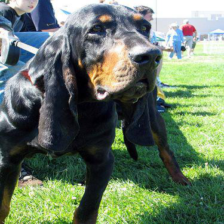

In [15]:
transform = T.Resize((224, 224))
transform(img)

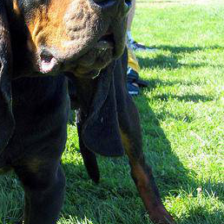

In [16]:
transform = T.RandomResizedCrop((224, 224), scale=(0.3, 1.2))
transform(img)

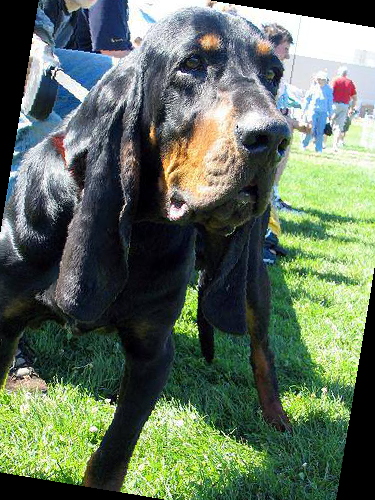

In [17]:
transform = T.RandomRotation(20)
transform(img)

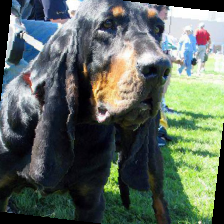

In [18]:
transforms = T.Compose([
    T.RandomResizedCrop((224, 224), scale=(0.5, 1.2)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(10)
])
transforms(img)

##Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) เป็นหนึ่งใน backbone ที่สำคัญของการใช้ Deep learning ในการประมวลผลภาพ ในหัวข้อนี้เราจะมาลองสร้าง CNN ของไลบรารี่ Pytorch กัน



Key Take away:


*   เราสามารถสร้าง layer ได้ด้วย class nn.Module, nn.Conv2d

*   โมเดลของ Pytorch รับภาพใน dimension ดังนี้ (batch size, depth, width, height)
*   วิธีการคำนวณขนาดของภาพหลังจากผ่าน Convolutional layer: (((W - K + 2P)/S) + 1) โดย W = ขนาดของภาพ, K = kernel size, S = stride, P = Padding (reference: https://stackoverflow.com/questions/53580088/calculate-the-output-size-in-convolution-layer)

Reference:


*   https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
transforms = T.Compose([
    T.RandomResizedCrop((224, 224), scale=(0.5, 1.2)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(10),
    T.ToTensor()
])

In [21]:
img_t = transforms(img)
img_t.shape

torch.Size([3, 224, 224])

In [22]:
img_tb = img_t.unsqueeze(0)
img_tb.shape

torch.Size([1, 3, 224, 224])

In [23]:
# ทดลองสร้าง Convolutional layer ที่รับ input depth = 3, output = 16, kernel size = 3, padding = 1
conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)

In [24]:
img_t = conv1(img_tb)
img_t.shape

torch.Size([1, 16, 224, 224])

In [25]:
# ทดลองสร้าง pooling 
pool = nn.MaxPool2d(2, 2)

In [26]:
img_t = pool(img_t)
img_t.shape

torch.Size([1, 16, 112, 112])

In [27]:
img_t = img_t.view(-1, 16 * 112 * 112)
img_t.shape

torch.Size([1, 200704])

In [28]:
class CNN(nn.Module):
    """
    Class ของ Convolutional layer ที่รับ input ภาพขนาด 3 x 224 x 224
    
    หน้าตาของโมเดล
    image --> [conv1 --> pool --> conv2 --> pool --> linear] --> output
    
    ขนาด input ของภาพ: (batchsize, 3, 224, 224)
    ขนาดของ output: (batchsize, 120) # ทำนาย logits ของพันธุ์หมา
    """
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(100352, 120)
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 56 * 56)
        x = self.dropout(x)
        x = F.relu(self.fc(x))
        return x

In [29]:
cnn_model = CNN()

In [30]:
img_t = transforms(img)
img_t = img_t.unsqueeze(0)
img_t.shape

torch.Size([1, 3, 224, 224])

In [31]:
logits = cnn_model(img_t)

In [32]:
logits.shape

torch.Size([1, 120])

In [33]:
# เปลี่ยนจาก logits เป็นความน่าจะเป็น
F.softmax(logits, dim=1)

tensor([[0.0080, 0.0081, 0.0086, 0.0088, 0.0083, 0.0080, 0.0080, 0.0080, 0.0080,
         0.0084, 0.0085, 0.0093, 0.0080, 0.0080, 0.0080, 0.0081, 0.0088, 0.0080,
         0.0080, 0.0093, 0.0083, 0.0082, 0.0085, 0.0084, 0.0080, 0.0080, 0.0080,
         0.0084, 0.0080, 0.0087, 0.0080, 0.0085, 0.0080, 0.0080, 0.0097, 0.0089,
         0.0082, 0.0080, 0.0081, 0.0080, 0.0093, 0.0083, 0.0086, 0.0083, 0.0085,
         0.0080, 0.0081, 0.0089, 0.0082, 0.0080, 0.0080, 0.0080, 0.0080, 0.0085,
         0.0093, 0.0085, 0.0080, 0.0080, 0.0093, 0.0080, 0.0080, 0.0088, 0.0088,
         0.0080, 0.0080, 0.0080, 0.0081, 0.0089, 0.0081, 0.0102, 0.0084, 0.0080,
         0.0080, 0.0093, 0.0082, 0.0094, 0.0081, 0.0080, 0.0080, 0.0080, 0.0089,
         0.0082, 0.0080, 0.0087, 0.0080, 0.0089, 0.0080, 0.0084, 0.0080, 0.0080,
         0.0080, 0.0080, 0.0084, 0.0084, 0.0081, 0.0085, 0.0084, 0.0088, 0.0092,
         0.0080, 0.0080, 0.0084, 0.0080, 0.0080, 0.0080, 0.0085, 0.0080, 0.0080,
         0.0080, 0.0099, 0.0